In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, f1_score
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso, PoissonRegressor

# Задача 1. Постройте модели для предсказания оценок студентов

По одной модели на каждую оценку из G1, G2 и G3. Результаты по каждой из моделей проинтерпретируйте и сравните.

------------

In [2]:
data = pd.read_csv('./students_regression.csv', delimiter=';')
data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


Провизуализируем данные:

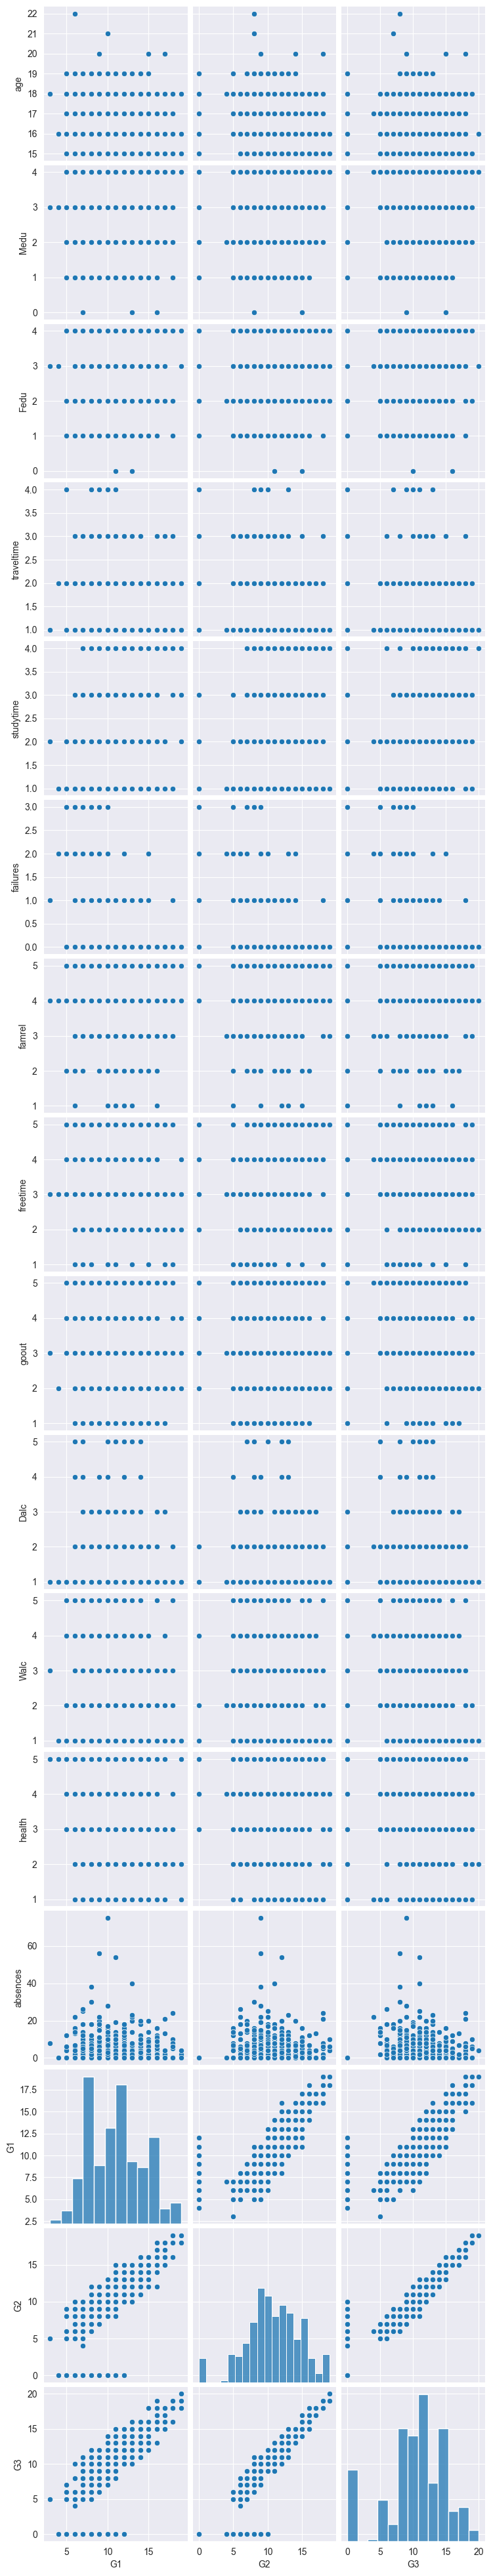

In [3]:
sns.pairplot(data, x_vars=['G1', 'G2', 'G3'])

Практически все признаки принимают дискретные значения. Попробуем применить регуляризацию LASSO. Также в нашем датасете есть признаки, которые не играют роли в регрессии.

In [4]:
print(data.columns)

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')


In [5]:
for col, t in data.dtypes.items():
    if t != np.int64:
        print(f'{col}: {data[col].unique()}')

school: ['GP' 'MS']
sex: ['F' 'M']
address: ['U' 'R']
famsize: ['GT3' 'LE3']
Pstatus: ['A' 'T']
Mjob: ['at_home' 'health' 'other' 'services' 'teacher']
Fjob: ['teacher' 'other' 'services' 'health' 'at_home']
reason: ['course' 'other' 'home' 'reputation']
guardian: ['mother' 'father' 'other']
schoolsup: ['yes' 'no']
famsup: ['no' 'yes']
paid: ['no' 'yes']
activities: ['no' 'yes']
nursery: ['yes' 'no']
higher: ['yes' 'no']
internet: ['no' 'yes']
romantic: ['no' 'yes']


Можем заменить булевые (строки yes и no) признаки на булевые.

In [6]:
data = pd.read_csv('./students_regression.csv', delimiter=';', true_values=['yes'], false_values=['no'])
data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [7]:
data.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup       bool
famsup          bool
paid            bool
activities      bool
nursery         bool
higher          bool
internet        bool
romantic        bool
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

Отбросим нечисловые признаки, так как они слабо влияют на модель.

In [8]:
data.drop(columns=data.columns[~((data.dtypes == np.int64) | (data.dtypes == np.bool_)).to_numpy()], inplace=True)
data

,age,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,activities,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,18,4,4,2,2,0,True,False,False,False,...,4,3,4,1,1,3,6,5,6,6
1,17,1,1,1,2,0,False,True,False,False,...,5,3,3,1,1,3,4,5,5,6
2,15,1,1,1,2,3,True,False,True,False,...,4,3,2,2,3,3,10,7,8,10
3,15,4,2,1,3,0,False,True,True,True,...,3,2,2,1,1,5,2,15,14,15
4,16,3,3,1,2,0,False,True,True,False,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,20,2,2,1,2,2,False,True,True,False,...,5,5,4,4,5,4,11,9,9,9
391,17,3,1,2,1,0,False,False,False,False,...,2,4,5,3,4,2,3,14,16,16
392,21,1,1,1,1,3,False,False,False,False,...,5,5,3,3,3,3,3,10,8,7
393,18,3,2,3,1,0,False,False,False,False,...,4,4,1,3,4,5,0,11,12,10


Train MSE: 2.2093622321933224
Test MSE: 4.102078818394482
Total MSE: 2.5879055494335543


<Axes: >

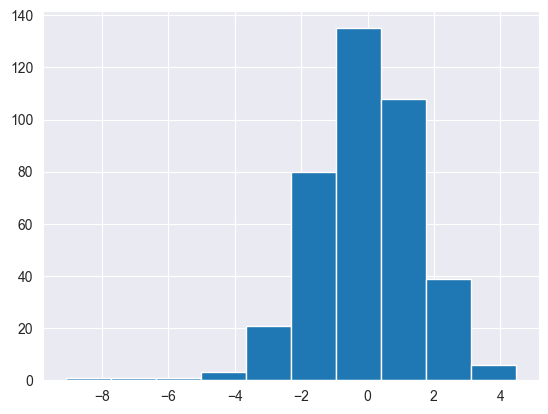

In [9]:
X, y = data.drop(columns=['G1']), data['G1']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
m = LinearRegression()
m.fit(X_train, y_train)
print(f'Train MSE: {mean_squared_error(m.predict(X_train), y_train)}')
print(f'Test MSE: {mean_squared_error(m.predict(X_test), y_test)}')
print(f'Total MSE: {mean_squared_error(m.predict(X), y)}')
(m.predict(X) - y).hist()

Невооружённым взглядом видно нормальное распределение. Взглянем на остатки.

[ 1.35242281e-01 -7.14733021e-02  2.40675983e-01  2.29264314e-01
  7.44984644e-02 -2.09087344e-01 -1.12162652e+00 -3.26679332e-01
 -1.61593481e-01  9.00330835e-02 -8.74429398e-02  3.67547665e-01
 -4.13328907e-01  2.67901518e-01  1.21096199e-01  1.26526864e-01
  2.74531211e-02 -6.32987674e-02 -8.15249558e-02  1.66516396e-02
  4.10046267e-04  6.53748984e-01  8.64303539e-02]


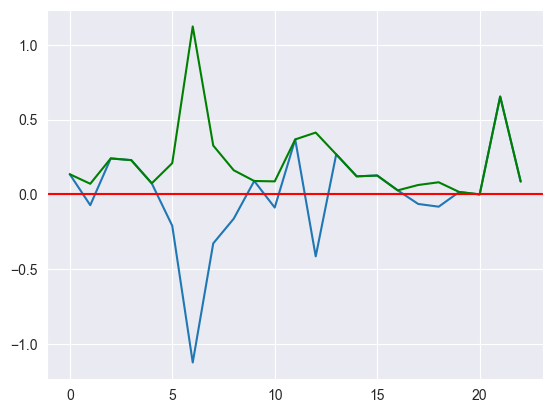

In [10]:
print(m.coef_)
plt.plot(m.coef_)
plt.plot(abs(m.coef_), c='g')
plt.axhline(0, c='r')

In [11]:
b = X.columns[abs(m.coef_).argmax()]
b

'schoolsup'

Cамым важным признаком оказался не один из других оценок:

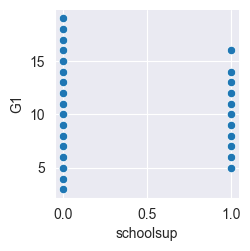

In [12]:
sns.pairplot(data, x_vars=[b], y_vars=['G1'])

Сделаем модели ля двух других оценок.

Train MSE: 1.7382658955946406
Test MSE: 1.954994281124074
Total MSE: 1.7816115727005275


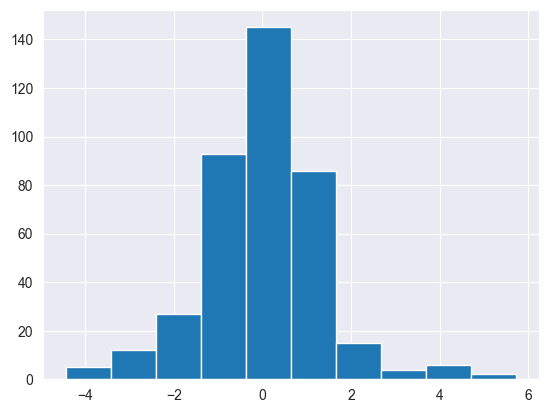

[ 0.03777667  0.02867058 -0.09770762 -0.24618336  0.03004301 -0.10367304
  0.13918718 -0.13010331  0.15889828  0.1760648   0.02861197  0.12451217
  0.36857031 -0.1430819  -0.18176704 -0.02652115 -0.1175101   0.03683831
  0.01742819 -0.10996776 -0.02651864  0.40319386  0.47228199]


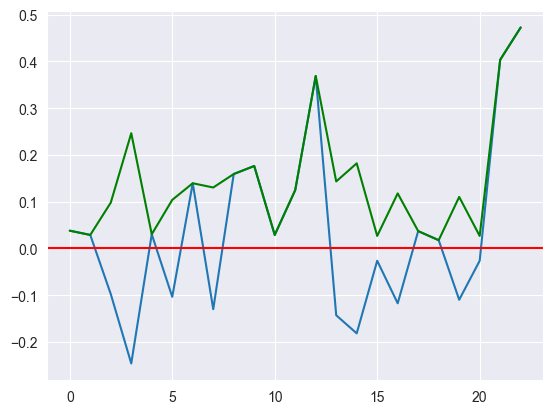

In [13]:
X, y = data.drop(columns=['G2']), data['G2']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
m = LinearRegression()
m.fit(X_train, y_train)
print(f'Train MSE: {mean_squared_error(m.predict(X_train), y_train)}')
print(f'Test MSE: {mean_squared_error(m.predict(X_test), y_test)}')
print(f'Total MSE: {mean_squared_error(m.predict(X), y)}')
(m.predict(X) - y).hist()
plt.show()
print(m.coef_)
plt.plot(m.coef_)
plt.plot(abs(m.coef_), c='g')
plt.axhline(0, c='r')

Для этой модели оценка получилась лучше, однако здесь понятно, что она работала с другими оценками.

Train MSE: 3.1377599162900744
Test MSE: 4.318022480011619
Total MSE: 3.373812429034383


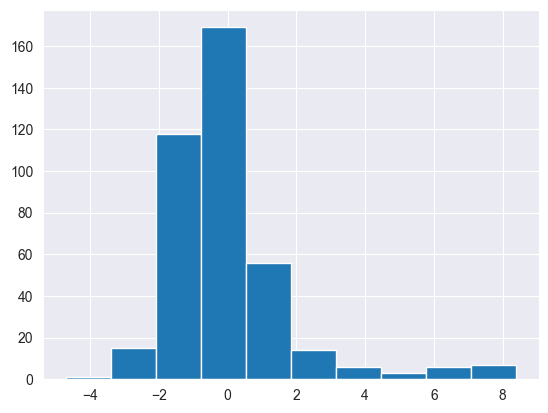

[-0.17030209  0.18748728 -0.15721759  0.13544089 -0.08169203 -0.21297578
  0.72606014  0.19180713  0.17469833 -0.43277461 -0.05056193 -0.29374366
 -0.09976919 -0.34720742  0.37864054  0.07419119 -0.02902416 -0.33558109
  0.3027861   0.02241163  0.04250228  0.14817572  0.96849934]


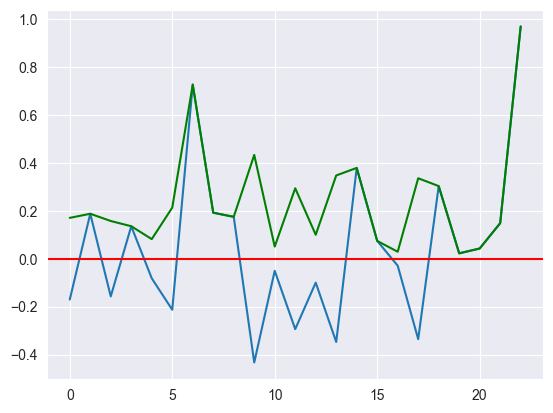

In [14]:
X, y = data.drop(columns=['G3']), data['G3']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
m = LinearRegression()
m.fit(X_train, y_train)
print(f'Train MSE: {mean_squared_error(m.predict(X_train), y_train)}')
print(f'Test MSE: {mean_squared_error(m.predict(X_test), y_test)}')
print(f'Total MSE: {mean_squared_error(m.predict(X), y)}')
(m.predict(X) - y).hist()
plt.show()
print(m.coef_)
plt.plot(m.coef_)
plt.plot(abs(m.coef_), c='g')
plt.axhline(0, c='r')

Модель явно хуже. Построим модель без регуляризации, но теперь не будем опираться на данные остальных оценок.

Train MSE: 8.43449136842413
Test MSE: 8.00881552550777
Total MSE: 8.349356199840859


<Axes: >

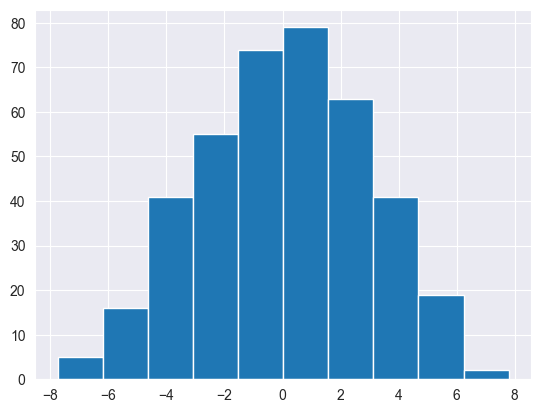

In [15]:
X, y = data.drop(columns=['G1', 'G2', 'G3']), data['G1']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
m = LinearRegression()
m.fit(X_train, y_train)
print(f'Train MSE: {mean_squared_error(m.predict(X_train), y_train)}')
print(f'Test MSE: {mean_squared_error(m.predict(X_test), y_test)}')
print(f'Total MSE: {mean_squared_error(m.predict(X), y)}')
(m.predict(X) - y).hist()

Всё ещё нормальное распределение, но модель стала чаще ошибаться, взглянем на коэффициенты.

[-0.00795784  0.37531748  0.25073926 -0.16877594  0.57878877 -1.00504334
 -2.54277623 -1.22648685 -0.11824483 -0.13219601  0.116782    1.35911476
  0.52322939 -0.39409635 -0.08719846  0.34178356 -0.49489782 -0.0412891
 -0.03784561 -0.15893667  0.01036348]


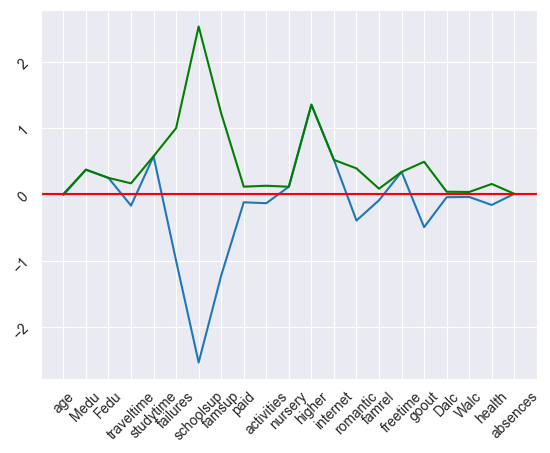

In [16]:
print(m.coef_)
plt.plot(X.columns, m.coef_)
plt.plot(abs(m.coef_), c='g')
plt.axhline(0, c='r')
plt.tick_params(rotation=45)

Посмотри на оценки:

In [17]:
print(data['G1'].sort_values().unique())
print(data['G2'].sort_values().unique())
print(data['G3'].sort_values().unique())

[ 3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
[ 0  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
[ 0  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]


Попробуем использовать L2 регуляризацию, хотя можно было и попробовать посмотреть на дерево принятия решений, так как оно нам подходит по смыслу.

alpha = 1e-05
Train MSE: 8.12748721891493
Test MSE: 9.488788185283553
Total MSE: 8.399747412188656


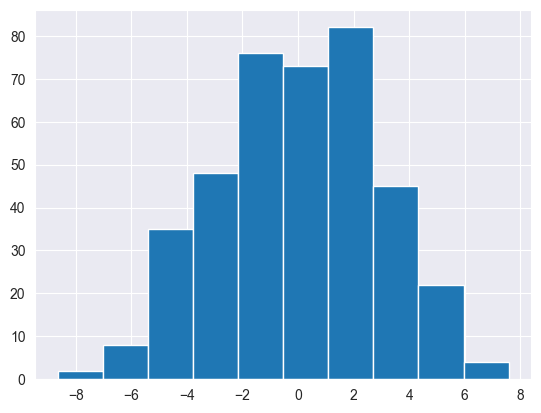

alpha = 0.0001
Train MSE: 8.127487218925179
Test MSE: 9.488785701395237
Total MSE: 8.399746915419191


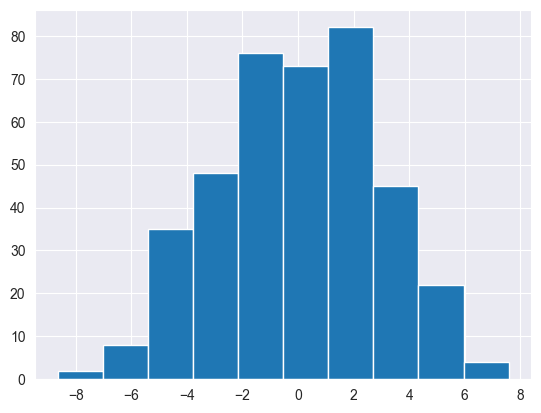

alpha = 0.001
Train MSE: 8.127487219949895
Test MSE: 9.4887608666924
Total MSE: 8.399741949298397


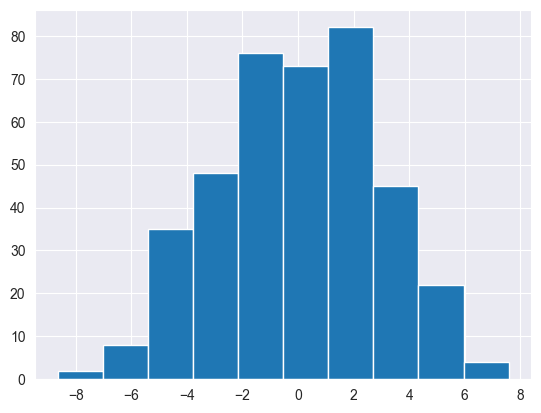

alpha = 0.01
Train MSE: 8.127487322291703
Test MSE: 9.488512937187325
Total MSE: 8.399692445270826


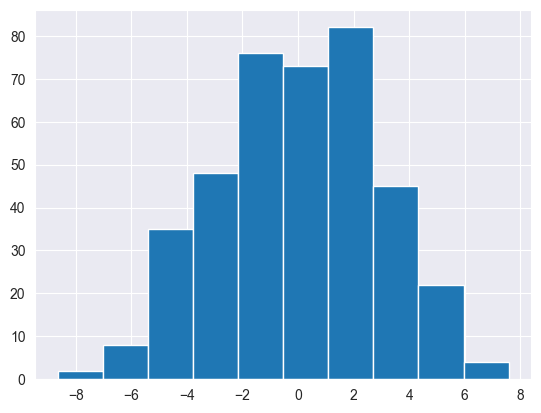

alpha = 0.1
Train MSE: 8.127497428108908
Test MSE: 9.486074891497537
Total MSE: 8.399212920786635


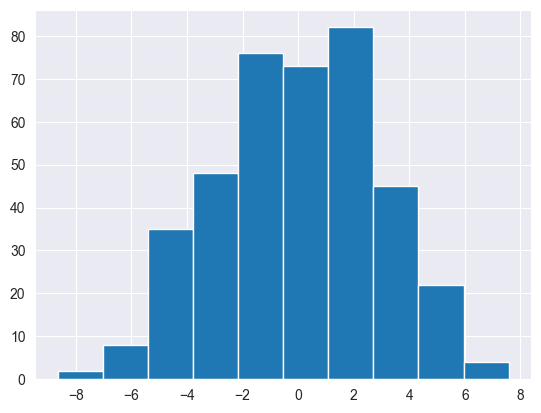

alpha = 0.2
Train MSE: 8.127527497984946
Test MSE: 9.4834518238599
Total MSE: 8.398712363159937


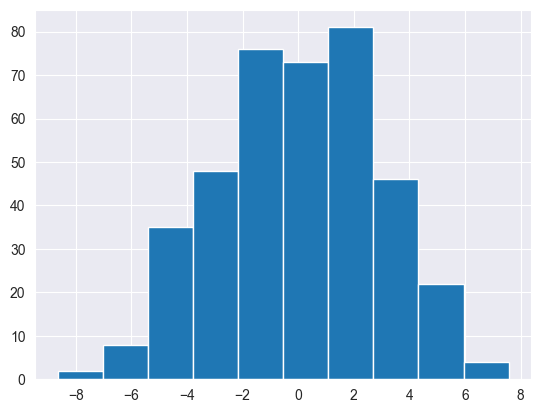

alpha = 0.5
Train MSE: 8.127729004971394
Test MSE: 9.476094203095522
Total MSE: 8.397402044596218


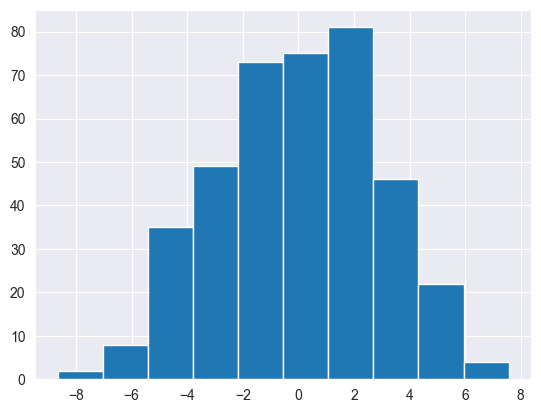

alpha = 1
Train MSE: 8.128393986307252
Test MSE: 9.465367344800157
Total MSE: 8.395788658005833


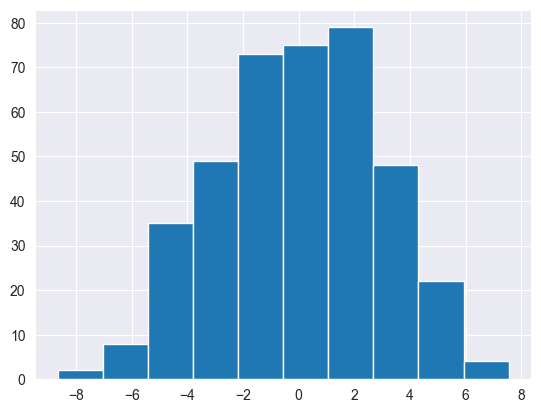

In [18]:
X, y = data.drop(columns=['G1', 'G2', 'G3']), data['G1']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10001)

for alpha in [0.00001, 0.0001, 0.001, 0.01, 0.1, 0.2, 0.5, 1]:
    print(f'alpha = {alpha}')
    m = Ridge(alpha=alpha, random_state=10001)
    m.fit(X_train, y_train)
    print(f'Train MSE: {mean_squared_error(m.predict(X_train), y_train)}')
    print(f'Test MSE: {mean_squared_error(m.predict(X_test), y_test)}')
    print(f'Total MSE: {mean_squared_error(m.predict(X), y)}')
    (m.predict(X) - y).hist()
    plt.show()

L2 регуляризация бесполезна, попробуем L1 регуляризацию.

alpha = 1e-05
Trin MSE: 8.127487227938765
Test MSE: 9.488675115878683
Total MSE: 8.39972480552675


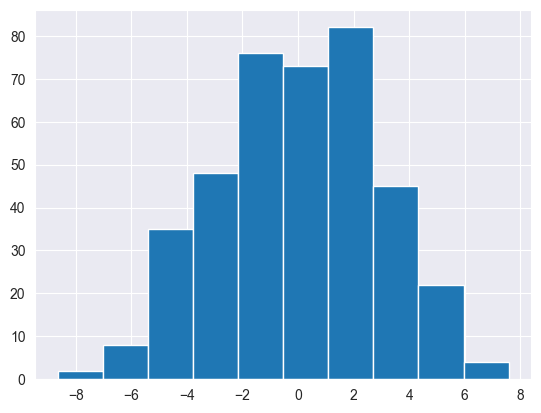

alpha = 0.0001
Trin MSE: 8.127488120077862
Test MSE: 9.487663673544038
Total MSE: 8.399523230771097


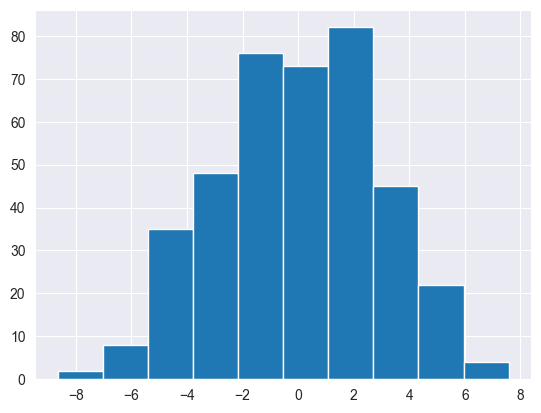

alpha = 0.001
Trin MSE: 8.127577492707927
Test MSE: 9.477627134931197
Total MSE: 8.397587421152581


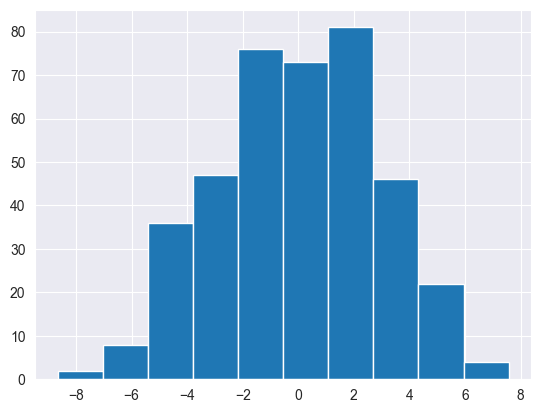

alpha = 0.01
Trin MSE: 8.136390640729877
Test MSE: 9.388919341005813
Total MSE: 8.386896380785062


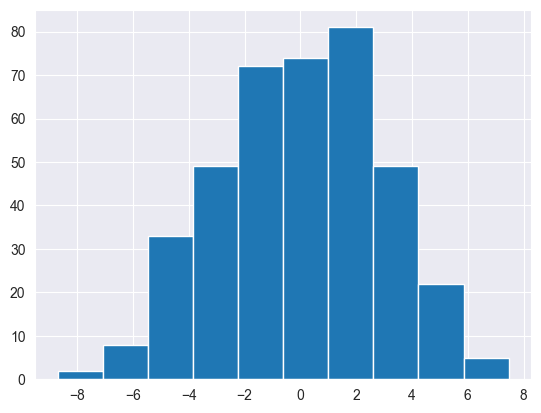

alpha = 0.1
Trin MSE: 8.531819969860774
Test MSE: 9.362919203377862
Total MSE: 8.698039816564192


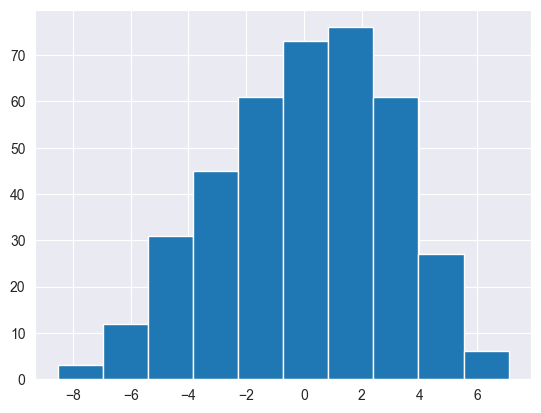

alpha = 0.2
Trin MSE: 9.031805211407242
Test MSE: 10.067116319477014
Total MSE: 9.238867433021195


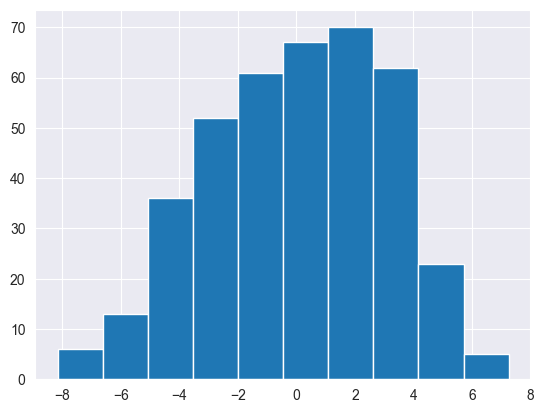

alpha = 0.5
Trin MSE: 9.782878323179418
Test MSE: 9.790477615454375
Total MSE: 9.78439818163441


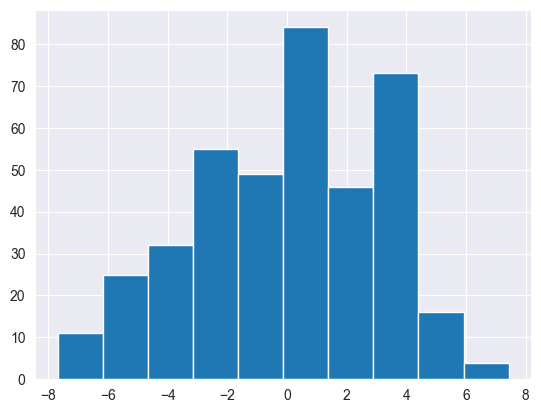

alpha = 1
Trin MSE: 11.148555740714022
Test MSE: 10.091029208166677
Total MSE: 10.937050434204552


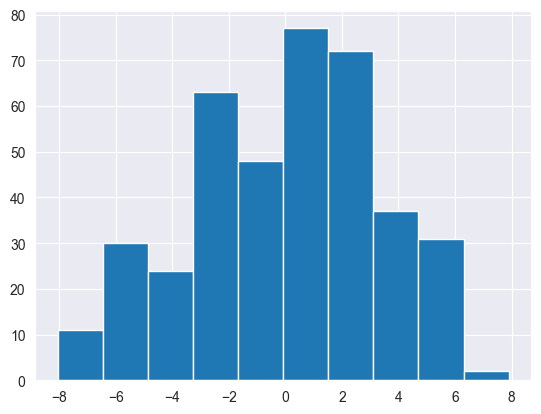

In [19]:
X, y = data.drop(columns=['G1', 'G2', 'G3']), data['G1']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10001)

for alpha in [0.00001, 0.0001, 0.001, 0.01, 0.1, 0.2, 0.5, 1]:
    print(f'alpha = {alpha}')
    m = Lasso(alpha=alpha, random_state=10001)
    m.fit(X_train, y_train)
    print(f'Trin MSE: {mean_squared_error(m.predict(X_train), y_train)}')
    print(f'Test MSE: {mean_squared_error(m.predict(X_test), y_test)}')
    print(f'Total MSE: {mean_squared_error(m.predict(X), y)}')
    (m.predict(X) - y).hist()
    plt.show()

Можно сделать вывод, что линейно независимые данные плохо моделируются моделью линейной регрессии.
Мы могли бы построить точную модель, которая будет опираться на другие оценки, но смысла в этом мало...

Train MSE: 2.735389825423955
Test MSE: 3.8369887650937162
All MSE: 2.9557096133579073


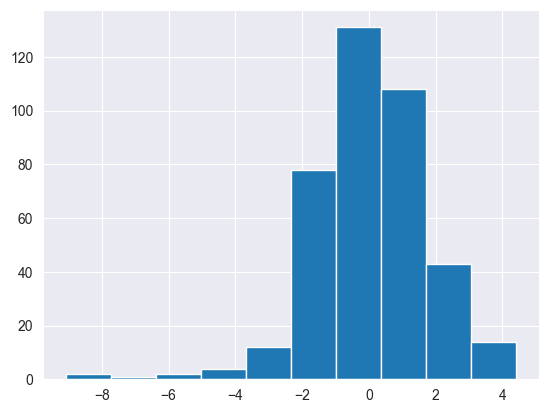

[0.62566233 0.12482954]


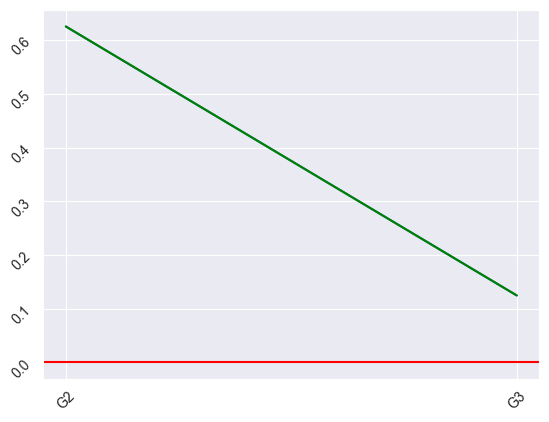

In [20]:
X, y = data[['G2', 'G3']], data['G1']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

m = LinearRegression()
m.fit(X_train, y_train)

print(f'Train MSE: {mean_squared_error(m.predict(X_train), y_train)}')
print(f'Test MSE: {mean_squared_error(m.predict(X_test), y_test)}')
print(f'All MSE: {mean_squared_error(m.predict(X), y)}')

(m.predict(X) - y).hist()
plt.show()

print(m.coef_)

plt.plot(X.columns, m.coef_)
plt.plot(abs(m.coef_), c='g')
plt.axhline(0, c='r')

plt.tick_params(rotation=45)

Train MSE: 2.8969538630045784
Test MSE: 3.1918220253475806
All MSE: 2.955927495473179


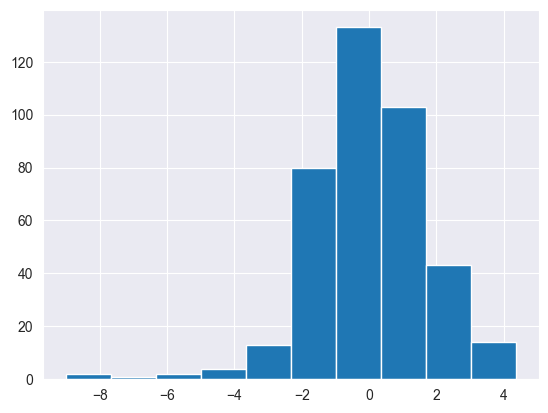

[0.60619817 0.13444075]


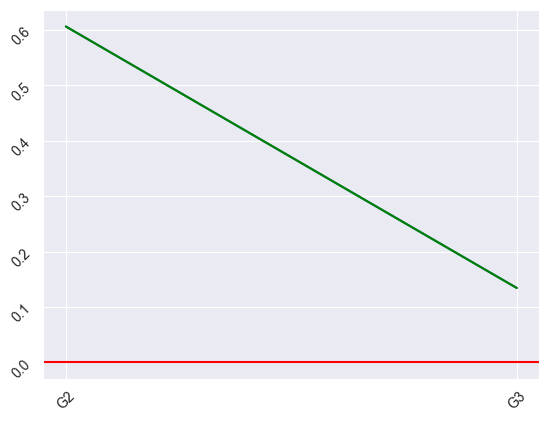

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

m = LinearRegression()
m.fit(X_train, y_train)

print(f'Train MSE: {mean_squared_error(m.predict(X_train), y_train)}')
print(f'Test MSE: {mean_squared_error(m.predict(X_test), y_test)}')
print(f'All MSE: {mean_squared_error(m.predict(X), y)}')

(m.predict(X) - y).hist()
plt.show()

print(m.coef_)

plt.plot(X.columns, m.coef_)
plt.plot(abs(m.coef_), c='g')
plt.axhline(0, c='r')

plt.tick_params(rotation=45)

Train MSE: 3.791474758146419
Test MSE: 3.452826796743858
All MSE: 3.723745165865907


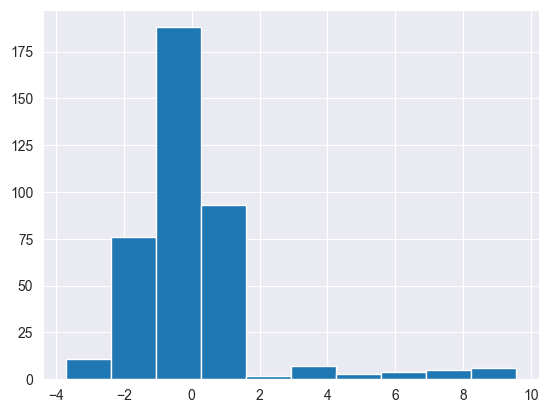

[0.15452633 0.99141443]


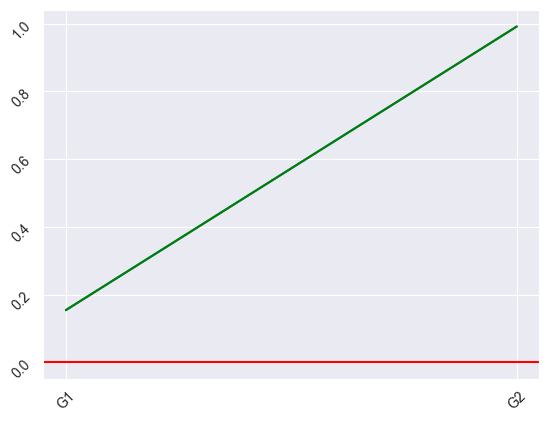

In [22]:
X, y = data[['G1', 'G2']], data['G3']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

m = LinearRegression()
m.fit(X_train, y_train)

print(f'Train MSE: {mean_squared_error(m.predict(X_train), y_train)}')
print(f'Test MSE: {mean_squared_error(m.predict(X_test), y_test)}')
print(f'All MSE: {mean_squared_error(m.predict(X), y)}')

(m.predict(X) - y).hist()
plt.show()

print(m.coef_)

plt.plot(X.columns, m.coef_)
plt.plot(abs(m.coef_), c='g')
plt.axhline(0, c='r')

plt.tick_params(rotation=45)

Было понятно, что будут хорошие результаты.

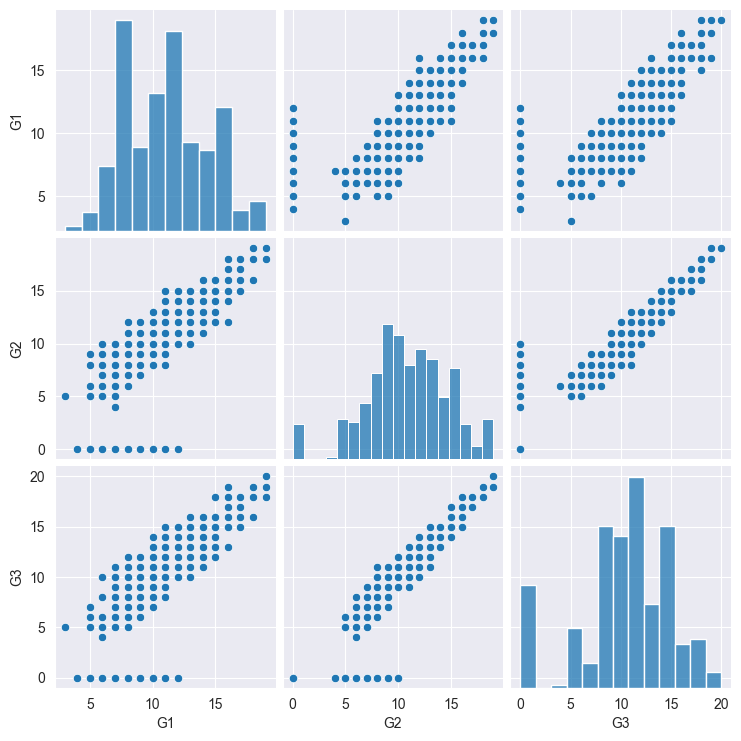

In [23]:
sns.pairplot(data, x_vars=['G1', 'G2', 'G3'], y_vars=['G1', 'G2', 'G3'])

Можно убрать некоторые выбросы.

Train MSE: 3.2749878158078345
Test MSE: 1.723915773240157
All MSE: 2.9647734072942997


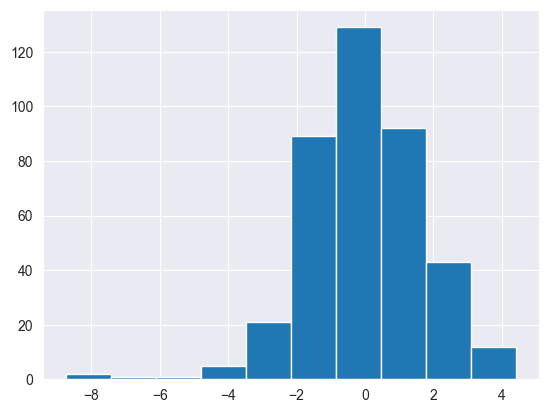

[0.58966331 0.12455567]


In [24]:
X, y = data[['G2', 'G3']], data['G1']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

m = Ridge(alpha=0.1)
m.fit(X_train, y_train)

print(f'Train MSE: {mean_squared_error(m.predict(X_train), y_train)}')
print(f'Test MSE: {mean_squared_error(m.predict(X_test), y_test)}')
print(f'All MSE: {mean_squared_error(m.predict(X), y)}')

(m.predict(X) - y).hist()
plt.show()

print(m.coef_)

Train MSE: 3.171924826187822
Test MSE: 2.100405107704782
All MSE: 2.9576208824912134


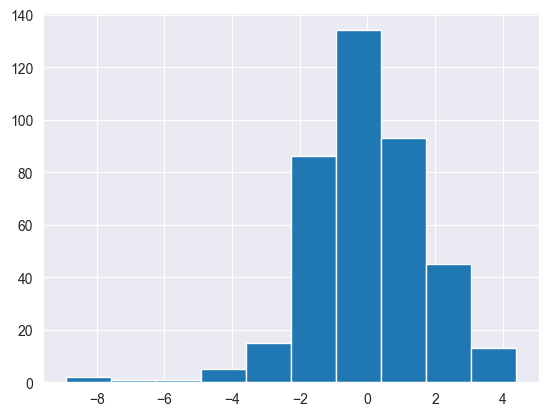

[0.5836507  0.14884282]


In [25]:
X, y = data[['G2', 'G3']], data['G1']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

m = Lasso(alpha=0.1)
m.fit(X_train, y_train)

print(f'Train MSE: {mean_squared_error(m.predict(X_train), y_train)}')
print(f'Test MSE: {mean_squared_error(m.predict(X_test), y_test)}')
print(f'All MSE: {mean_squared_error(m.predict(X), y)}')

(m.predict(X) - y).hist()
plt.show()

print(m.coef_)

По итогу можно сказать, что наши данные содержат много категориальных признаков, которые непонятно как закодировать, не привнося лишнюю информацию о линейном порядке. Из-за этого мы теряем информацию, потому что не можем использовать признаки в линейной модели. Также между оценками и признаками, которыми получилось наделить нашу модель, отсутствует явная линейная связь, поэтому результаты, получающиеся в итоге, хотя и обладают нормально распределёнными остатками, но ошибаются почти в два раза в среднем, и регуляризация от этого не спасает, к сожалению.

# Задача 2. Постройте модель для предсказания вероятности диабета у человека на основе предоставленных признаков

Отберите из предоставленных признаков только самые важные, основываясь на подборе наиболее подходящей по метрике f1-score модели (максимальном качестве по данной метрике).

------------

In [26]:
data = pd.read_csv('./diabetes_classification.csv')
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


По условию задачи, можем судить о том, что нам надо воспользоваться регуляризацией LASSO, а потом использовать выбор гиперпараметра по сетке. Для начала посмотрим на данные.

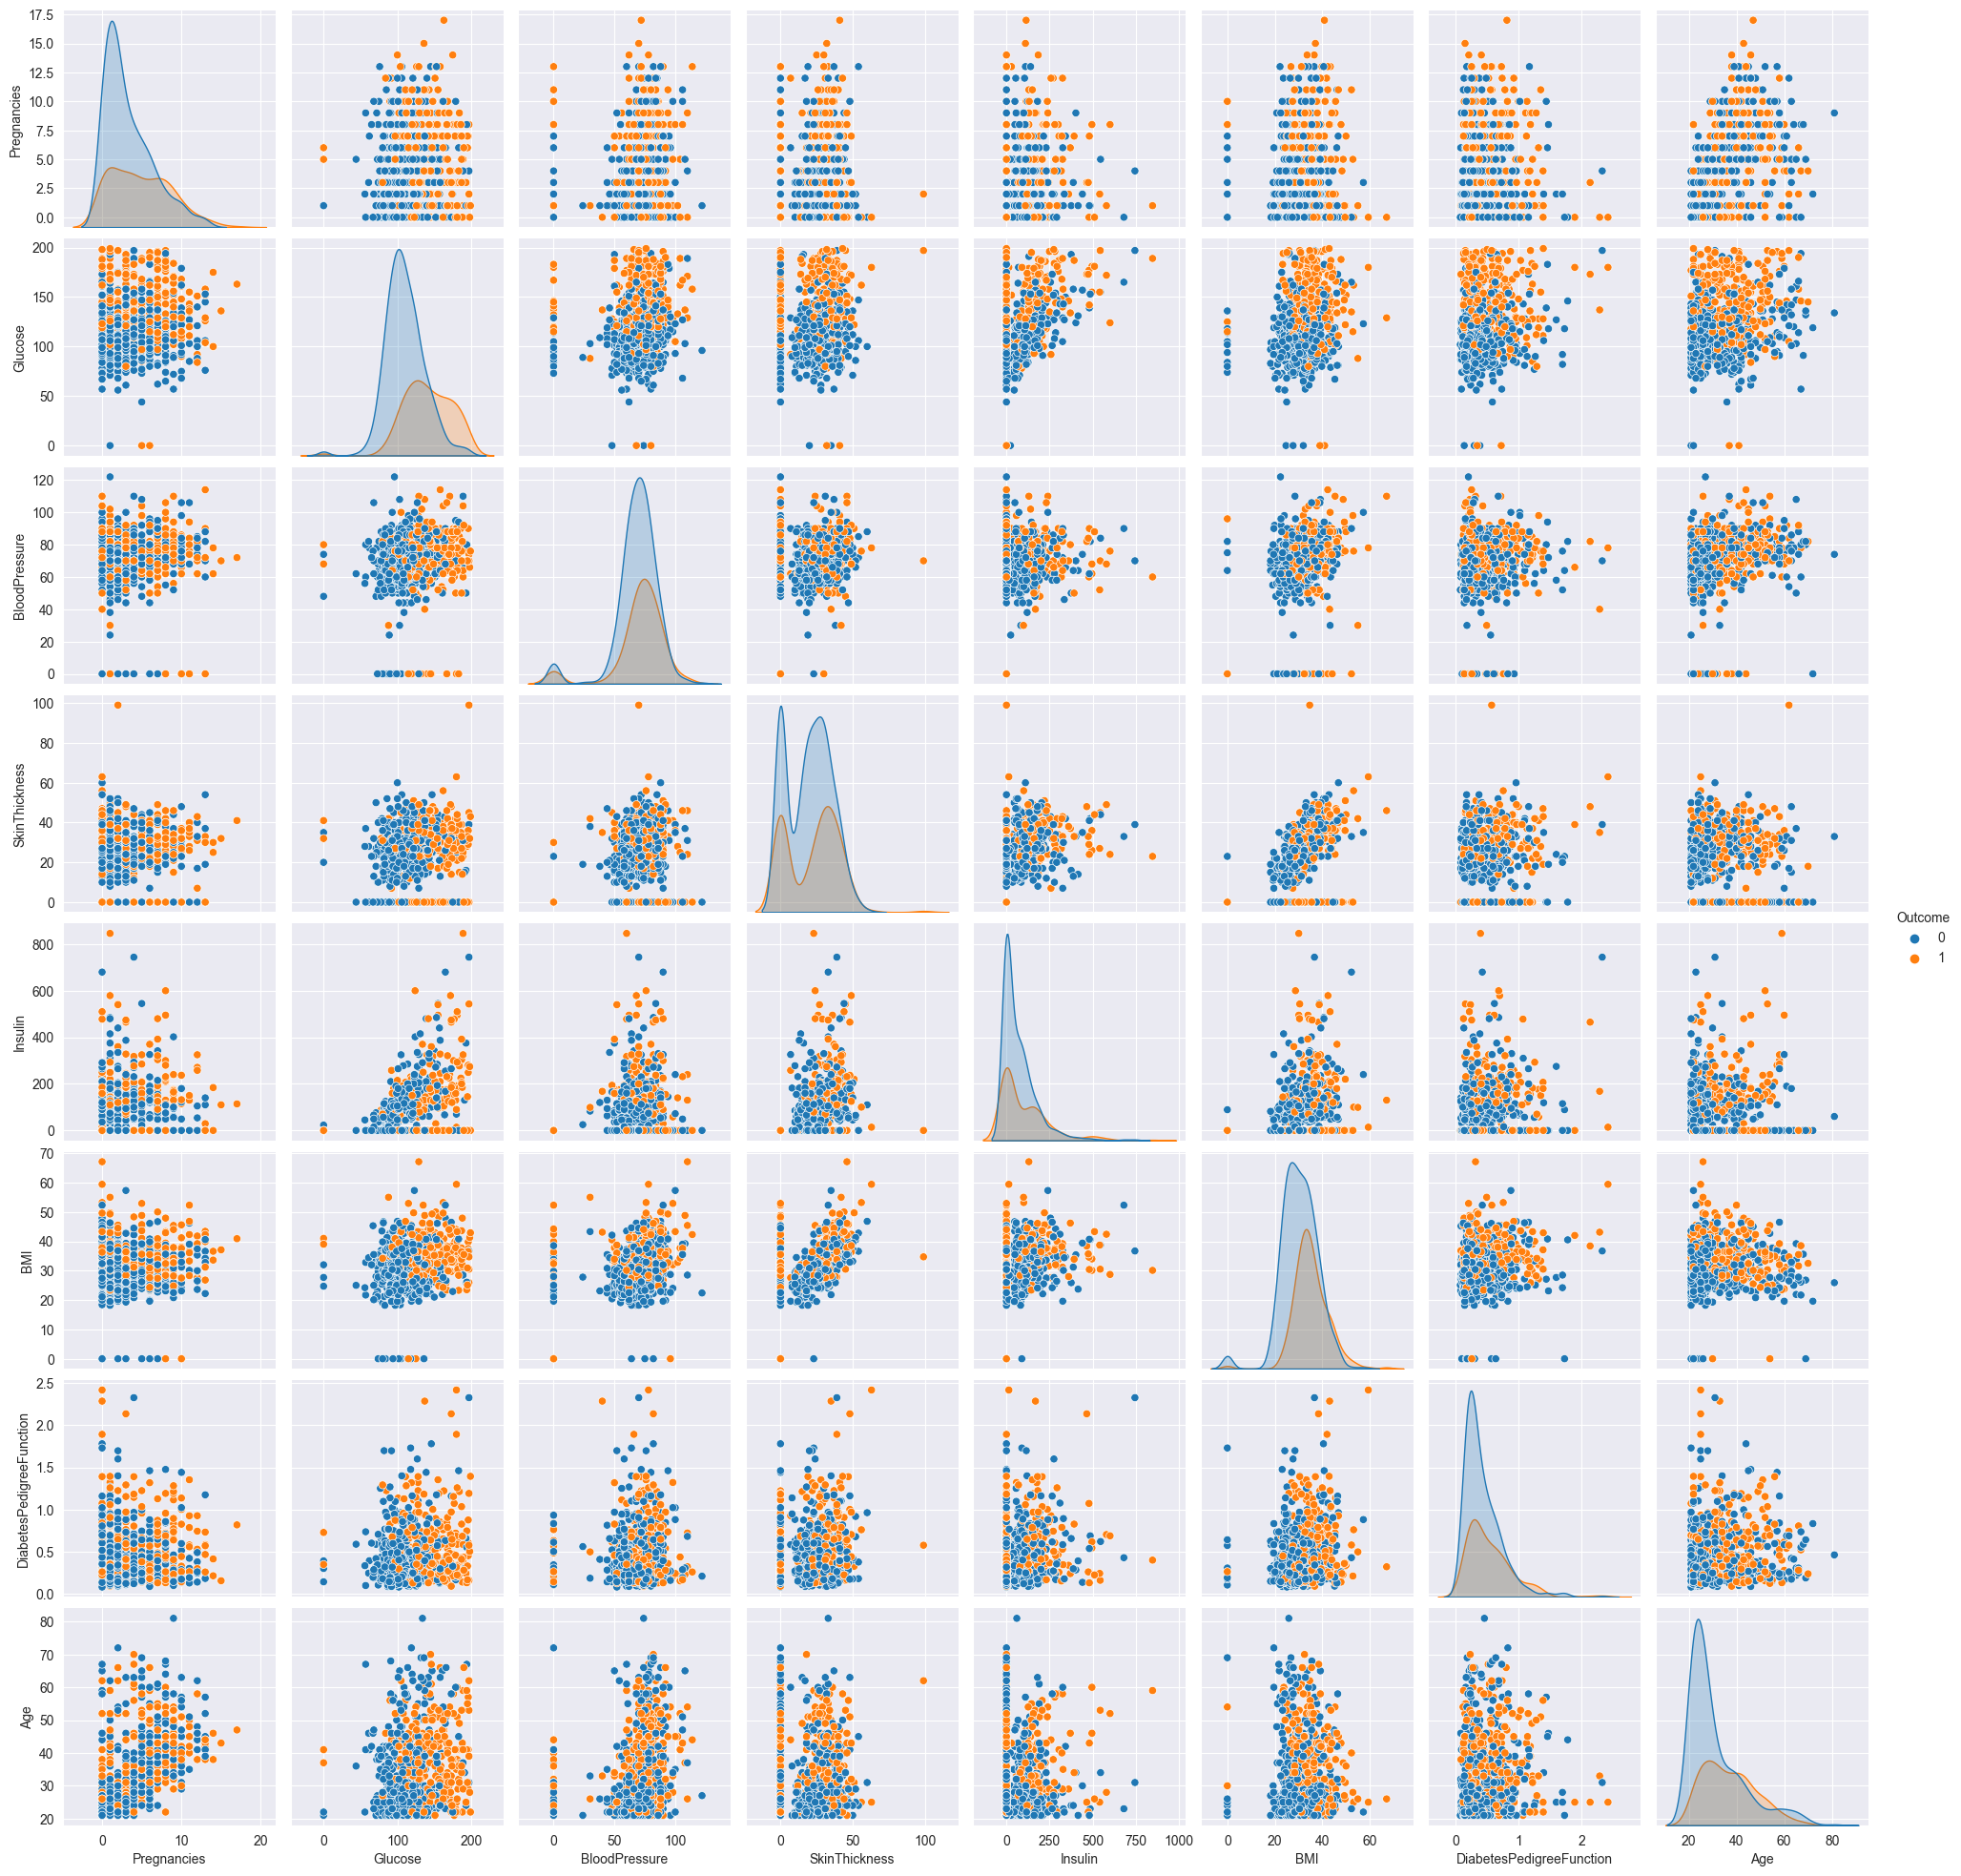

In [27]:
sns.pairplot(data, hue='Outcome')

Видно, что по двум признакам данные не разделяются линейно. Будем надеяться, что смодем поделить по большему числу признаков.

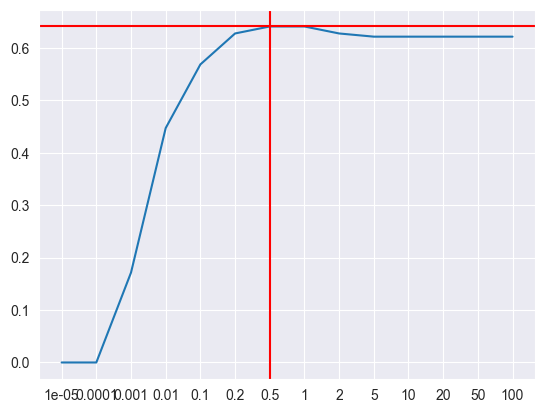

In [28]:
X, y = data.drop(columns='Outcome'), data['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
penalty_values = [0.00001, 0.0001, 0.001, 0.01, 0.1, 0.2, 0.5, 1, 2, 5, 10, 20, 50, 100]
coefs_values = []
f1_values = []

for penalty_value in penalty_values:
    m = LogisticRegression(solver='liblinear', penalty='l1', C=penalty_value)
    m.fit(X_train, y_train)
    f1_values.append(f1_score(y_test, m.predict(X_test)))
    coefs_values.append(m.coef_.copy())
    
plt.plot([str(x) for x in penalty_values], f1_values)
plt.axhline(max(f1_values), c='r')
plt.axvline(np.argmax(f1_values), c='r')

Виден пик на значении L1 регуляризации в 0.2 с соответствующим значением F1-score 0.7.
Посмотрим на коэффициенты в привязке к значению гиперпараметра:

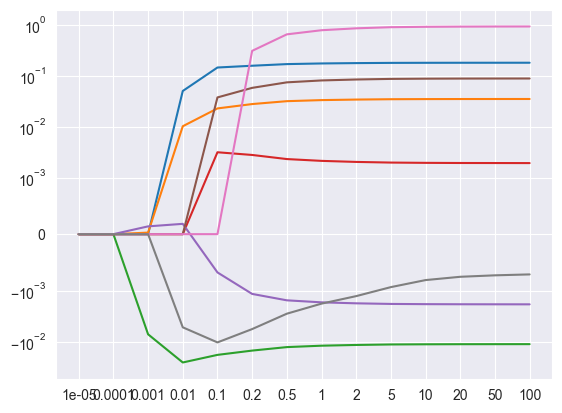

In [29]:
coefs_values = np.array(coefs_values).reshape((len(penalty_values), -1))
plt.plot([str(x) for x in penalty_values], coefs_values)
plt.yscale('symlog', linthresh=0.001)

Видим, что в окрестности и вправо от выбранного значения 0.2f коэффициенты не меняют знак, то есть мы точно можем доверять этому. Однако, все коэффициенты имеют ненулевые значения, то есть мы не сможем выбрать из них самые важные.

С другой стороны, если мы посмотрим на предыдущем графике на отметку около значения 0.1, то заметим, что F1-score при этом значении гиперпараметра тоже не очень уж маленький, хотя и меньше, чем при 0.2. Зато при нём ещё есть нулевые коэффициенты:

In [30]:
pd.DataFrame(np.hstack((coefs_values, np.array(f1_values).reshape((-1, 1)))), index=penalty_values, columns=np.hstack((X.columns, ['F1-score'])))

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,F1-score
0.00001,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
0.00010,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
0.00100,0.000000,0.000027,-0.007196,0.000000,0.000138,0.000000,0.000000,0.000000,0.171429
0.01000,0.050413,0.010224,-0.025751,0.000000,0.000182,0.000000,0.000000,-0.005247,0.447059
0.10000,0.145850,0.022900,-0.018259,0.003151,-0.000677,0.037671,0.000000,-0.010381,0.568421
0.20000,0.158042,0.027895,-0.015036,0.002788,-0.001157,0.058064,0.309831,-0.005681,0.627451
0.50000,0.170173,0.031801,-0.012842,0.002316,-0.001546,0.074523,0.654113,-0.002832,0.640777
1.00000,0.175269,0.033369,-0.012051,0.002134,-0.001695,0.081243,0.788182,-0.001797,0.640777
2.00000,0.178054,0.034192,-0.011650,0.002035,-0.001771,0.084774,0.859308,-0.001278,0.627451
5.00000,0.179829,0.034733,-0.011394,0.001975,-0.001821,0.087107,0.904284,-0.000937,0.621359


Можно считать, что наименее важными признаками являются DiabetesPedigreeFunction, Age.

In [31]:
data = pd.read_csv('./freMTPL2freq.csv')
data

,IDpol,ClaimNb,Exposure,Area,VehPower,VehAge,DrivAge,BonusMalus,VehBrand,VehGas,Density,Region
0,1.0,1,0.10000,D,5,0,55,50,B12,Regular,1217,R82
1,3.0,1,0.77000,D,5,0,55,50,B12,Regular,1217,R82
2,5.0,1,0.75000,B,6,2,52,50,B12,Diesel,54,R22
3,10.0,1,0.09000,B,7,0,46,50,B12,Diesel,76,R72
4,11.0,1,0.84000,B,7,0,46,50,B12,Diesel,76,R72
...,...,...,...,...,...,...,...,...,...,...,...,...
678008,6114326.0,0,0.00274,E,4,0,54,50,B12,Regular,3317,R93
678009,6114327.0,0,0.00274,E,4,0,41,95,B12,Regular,9850,R11
678010,6114328.0,0,0.00274,D,6,2,45,50,B12,Diesel,1323,R82
678011,6114329.0,0,0.00274,B,4,0,60,50,B12,Regular,95,R26


Видимо надо использовать L1 регуляризацию. Отбросим категориальные признаки.
VehGas поменяем на булевый тип. IDpol отбросим, это уникальный идентификатор.

In [32]:
data = pd.read_csv('./freMTPL2freq.csv', index_col='IDpol', dtype={ 'IDpol': np.int64 })
data['VehGas'] = data['VehGas'] == 'Diesel'
data

,ClaimNb,Exposure,Area,VehPower,VehAge,DrivAge,BonusMalus,VehBrand,VehGas,Density,Region
IDpol,,,,,,,,,,,
1,1,0.10000,D,5,0,55,50,B12,False,1217,R82
3,1,0.77000,D,5,0,55,50,B12,False,1217,R82
5,1,0.75000,B,6,2,52,50,B12,True,54,R22
10,1,0.09000,B,7,0,46,50,B12,True,76,R72
11,1,0.84000,B,7,0,46,50,B12,True,76,R72
...,...,...,...,...,...,...,...,...,...,...,...
6114326,0,0.00274,E,4,0,54,50,B12,False,3317,R93
6114327,0,0.00274,E,4,0,41,95,B12,False,9850,R11
6114328,0,0.00274,D,6,2,45,50,B12,True,1323,R82


In [33]:
data1 = data.drop(columns=['Area', 'VehBrand', 'Region'])
data1

,ClaimNb,Exposure,VehPower,VehAge,DrivAge,BonusMalus,VehGas,Density
IDpol,,,,,,,,
1,1,0.10000,5,0,55,50,False,1217
3,1,0.77000,5,0,55,50,False,1217
5,1,0.75000,6,2,52,50,True,54
10,1,0.09000,7,0,46,50,True,76
11,1,0.84000,7,0,46,50,True,76
...,...,...,...,...,...,...,...,...
6114326,0,0.00274,4,0,54,50,False,3317
6114327,0,0.00274,4,0,41,95,False,9850
6114328,0,0.00274,6,2,45,50,True,1323


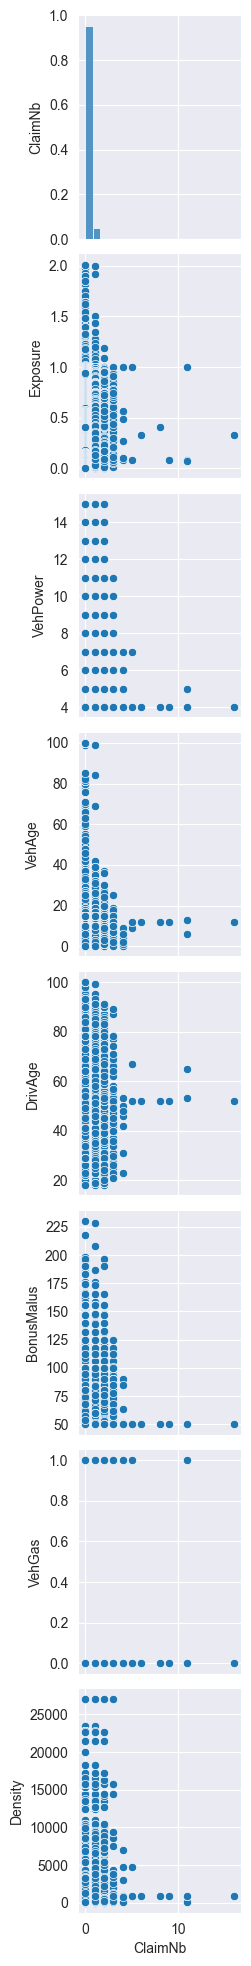

In [34]:
sns.pairplot(data1, x_vars=['ClaimNb'])

Опять сложно разделить признаки линейно, но можно попробовать. Воспользуемся L1 регуляризацией.

alpha = 1e-06


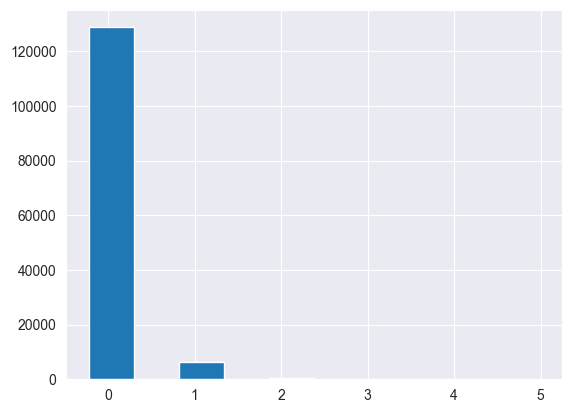

alpha = 1e-05


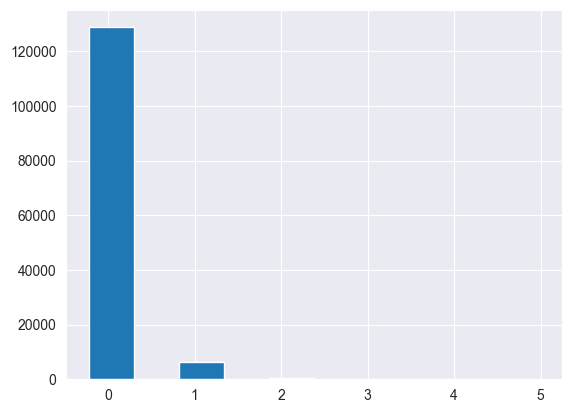

alpha = 0.0001


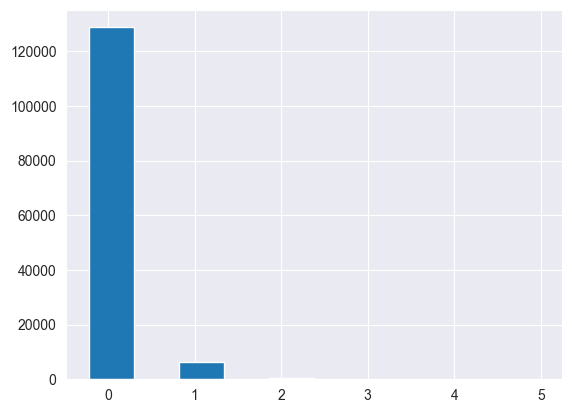

alpha = 0.001


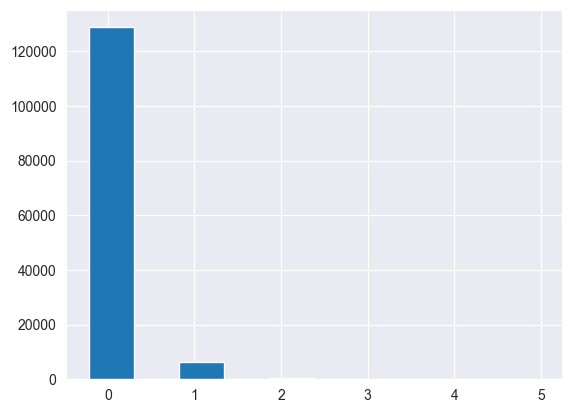

alpha = 0.01


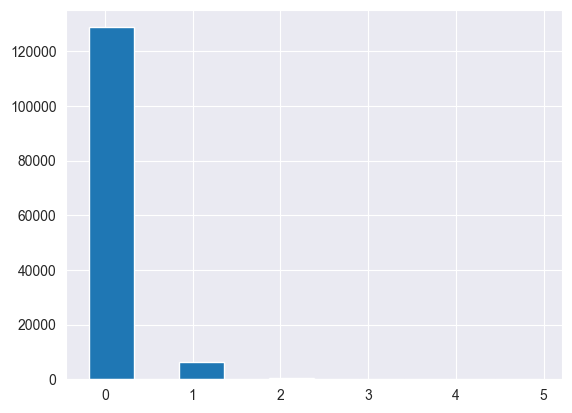

alpha = 0.1


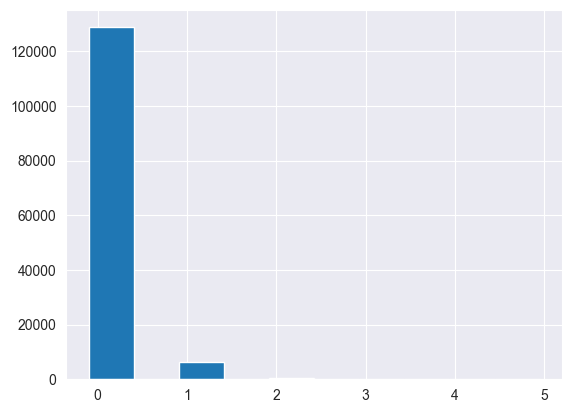

alpha = 0.2


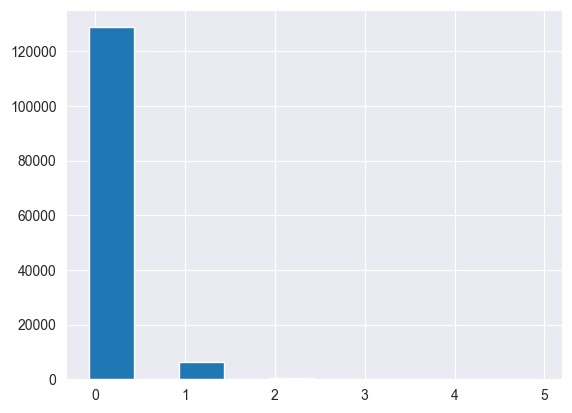

alpha = 0.5


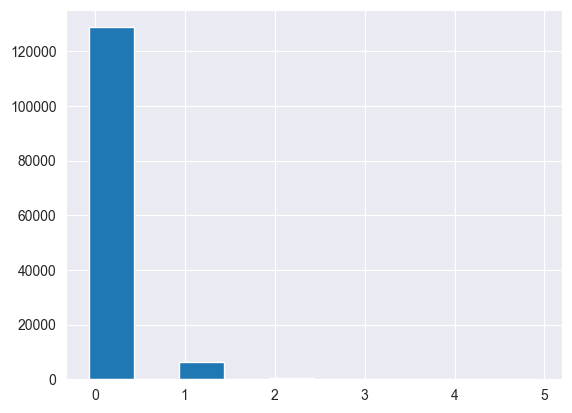

alpha = 1


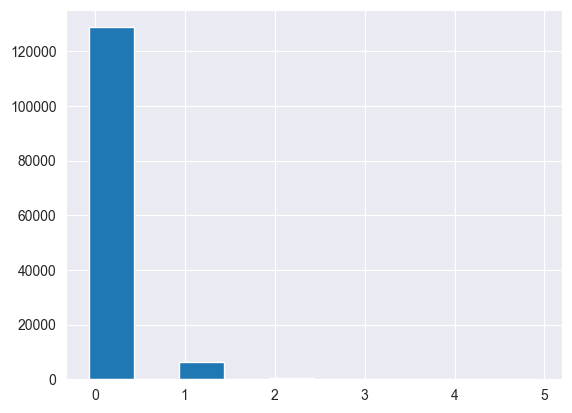

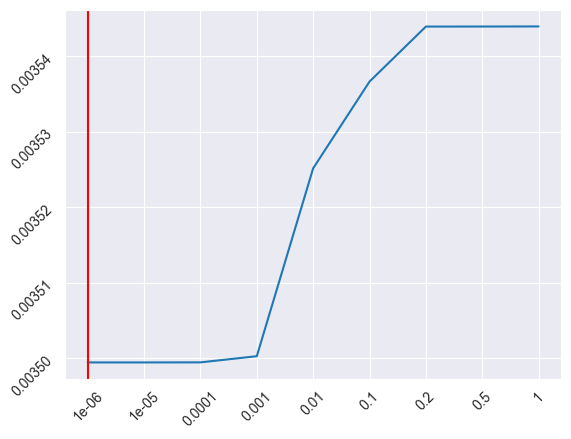

In [35]:
X, y = data1.drop(columns='ClaimNb'), data1['ClaimNb']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

alpha_values = [0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 0.2, 0.5, 1]
coefs_values = []
mse_values = []

for alpha_value in alpha_values:
    print(f'alpha = {alpha_value}')
    m = Lasso(alpha=alpha_value)
    m.fit(X_train, y_train)
    y_pred = m.predict(X_test)
    mse_values.append(mean_squared_error(y_test, y_pred))
    coefs_values.append(m.coef_.copy())
    pd.Series(y_test - y_pred).hist()
    plt.show()
    
mse_values = np.array(mse_values)
plt.plot([str(x) for x in alpha_values], mse_values / (y.max() - y.min()))
plt.axvline(np.argmin(mse_values), c='r')
plt.tick_params(rotation=45)

MSE маленький, значит модель хорошо обучилась. Однако остатки распределены скорее по экспоненциальному распределению. Посмотрим на график коэффициентов модели.

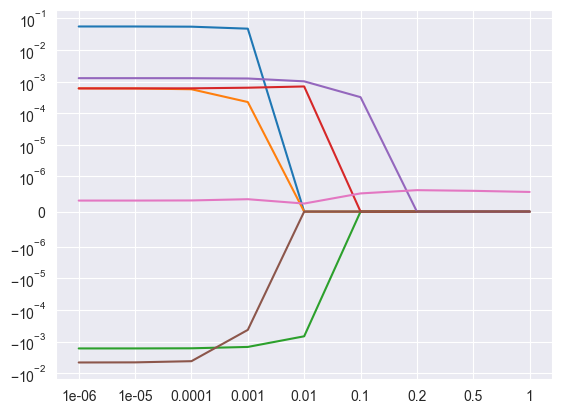

In [36]:
coefs_values = np.array(coefs_values).reshape((len(alpha_values), -1))
plt.plot([str(x) for x in alpha_values], coefs_values)
plt.yscale('symlog', linthresh=0.000001)

Хорошо, что никакие из коэффициентов не поменяли свой знак.
Однако, нет занулившихся коэффициентов. Интересно, что коэффициент Density совсем уж близко к нулю, но ненулевой:

In [37]:
pd.DataFrame(
    np.hstack((coefs_values, np.array(mse_values).reshape((-1, 1)), np.array(mse_values / (y.max() - y.min())).reshape((-1, 1)))),
    index=alpha_values,
    columns=np.hstack((X.columns, ['MSE', 'MSE / y'])),
)

,Exposure,VehPower,VehAge,DrivAge,BonusMalus,VehGas,Density,MSE,MSE / y
0.000001,0.055688,0.000614,-0.001652,0.000612,0.001290,-0.004596,3.138502e-07,0.055992,0.003499
0.000010,0.055614,0.000610,-0.001651,0.000612,0.001289,-0.004558,3.142013e-07,0.055992,0.003499
0.000100,0.054874,0.000575,-0.001635,0.000615,0.001287,-0.004183,3.177117e-07,0.055992,0.003499
0.001000,0.047472,0.000227,-0.001481,0.000643,0.001259,-0.000428,3.528129e-07,0.056005,0.003500
0.010000,0.000000,-0.000000,-0.000682,0.000705,0.001023,-0.000000,2.292924e-07,0.056403,0.003525
0.100000,0.000000,-0.000000,-0.000000,0.000000,0.000323,-0.000000,5.177420e-07,0.056587,0.003537
0.200000,0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.000000,6.106617e-07,0.056703,0.003544
0.500000,0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.000000,5.914735e-07,0.056703,0.003544
1.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.000000,5.594930e-07,0.056704,0.003544


Вообще, если не обращать внимание на распределение остатков, модель и так получилась очень репрезентативной. На тестовой выборке MSE составляет 0.059, что всего 0.3% от диапазона значений.
Всё ещё признак Density имеет очень малый коэффициент и скорее всего может быть опущен. Помимо него все остальные признаки обладают довольно высокими коэффициентами. Можно не учитывать значения категориальных признаков.